## CNN : Local Connections & Shared Weights

* Translation Invariance:
    * The network should respond similarly to the same patch, regardless of where it appears in the image. 

* Locality Principle:
    * The earliest layers of the network should focus on local regions, without regard for the contents of the image in distant regions. This is the locality principle. Eventually, these local representations can be aggregated to make predictions at the whole image level.
    
Translation invariance in images implies that all patches of an image will be treated in the same manner.

Locality means that only a small neighborhood of pixels will be used to compute the corresponding hidden representations.

## CNN Over NN

* CNN have sparse connections instead of fully connected connections which lead to reduced parameters and make CNN’s efficient for processing high dimensional data.

* Weight sharing takes place where the same weights are shared across the entire image, causing reduced memory requirements as well as translational equivariance(will be explained in a moment). 

* CNN’s use a very important concept of subsampling or pooling in which the most prominent pixels are propagated to the next layer dropping the rest. This provides a fixed size output matrix which is typically required for classification and invariance to translation, rotation.

## Translational Equivariance:

* the position of the object in the image should not be fixed in order for it to be detected by the CNN.



## Convolution

* image : ($n_h, n_w$); kernel : ($k_h, k_w$)
* Convolution output : $(n_h - k_h + 1), (n_w - k_w + 1)$ : Remember like, when $k_h \ or \ k_w$ is 1, we get output same size as input

In [1]:
import tensorflow as tf
import numpy as np

In [29]:
x = tf.Variable([[0., 1., 2.], [3., 4., 5.], [6., 7., 8.]])  ## Ensure its in float32
k = tf.Variable([[0., 1.], [2., 3.]])
def corr2d(x, k): #@save
    """Compute 2D cross-correlation."""
    xh, xw = x.shape; kh, kw = k.shape

    y = tf.Variable(tf.zeros(shape = ((xh - kh + 1), (xw - kw + 1))))
    yh, yw = y.shape

    for i in range(yh):
        for j in range(yw):
            y[i, j].assign(tf.reduce_sum(tf.math.multiply(x[i:i + kh, j:j + kw], k)))  
    return y
corr2d(x, k)

&lt;tf.Variable &#39;Variable:0&#39; shape=(2, 2) dtype=float32, numpy=
array([[19., 25.],
       [37., 43.]], dtype=float32)&gt;

### Convolution Layer

* It cross-correlates inputs, kernel and adds a scalar bias

* Like NN, kernels & bias are randomly initialized

In [123]:
class Conv2D(tf.keras.layers.Layer): #@save
    def __init__(self, kernel_size):
        super().__init__()
        self.kernel_size = kernel_size

    def build(self, use_bias = True):
        initializer = tf.random_normal_initializer()
        self.weight = self.add_weight(name = 'w', shape = self.kernel_size, 
        initializer = initializer, trainable = True)
        self.bias = self.add_weight(name = 'b', shape = (1,), 
        initializer = initializer, trainable = True)

    def call(self, inputs):
        return corr2d(inputs, self.weight) + self.bias

In [124]:
X = tf.reshape(X, (6, 8))
my_conv2d = Conv2D(kernel_size = (1, 2))
my_conv2d(X)

&lt;tf.Tensor: shape=(6, 7), dtype=float32, numpy=
array([[-0.05780296, -0.05182651, -0.00374866, -0.00374866, -0.00374866,
        -0.00972512, -0.05780296],
       [-0.05780296, -0.05182651, -0.00374866, -0.00374866, -0.00374866,
        -0.00972512, -0.05780296],
       [-0.05780296, -0.05182651, -0.00374866, -0.00374866, -0.00374866,
        -0.00972512, -0.05780296],
       [-0.05780296, -0.05182651, -0.00374866, -0.00374866, -0.00374866,
        -0.00972512, -0.05780296],
       [-0.05780296, -0.05182651, -0.00374866, -0.00374866, -0.00374866,
        -0.00972512, -0.05780296],
       [-0.05780296, -0.05182651, -0.00374866, -0.00374866, -0.00374866,
        -0.00972512, -0.05780296]], dtype=float32)&gt;

### Detecting Edges in Images

In [32]:
X = tf.Variable(tf.ones((6, 8)))
X[:, 2:6].assign(tf.zeros(X[:, 2:6].shape))
X

&lt;tf.Variable &#39;Variable:0&#39; shape=(6, 8) dtype=float32, numpy=
array([[1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.]], dtype=float32)&gt;

In [40]:
K = tf.constant([[1., -1.]])
## 1 for the edge from white to black and -1 for the edge from black to white
corr2d(X, K)

&lt;tf.Variable &#39;Variable:0&#39; shape=(6, 7) dtype=float32, numpy=
array([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.]], dtype=float32)&gt;

In [46]:
## This kernel detects only vertical edges
corr2d(tf.transpose(X), K)

&lt;tf.Variable &#39;Variable:0&#39; shape=(8, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)&gt;

In [45]:
## If you flip the kernel, it detects horizontal edge
corr2d(tf.transpose(X), tf.transpose(K))

&lt;tf.Variable &#39;Variable:0&#39; shape=(7, 6) dtype=float32, numpy=
array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)&gt;

### Learning the kernels 

* What if we learn the vertical edge detector kernels

* We know the input - X and output - Y.

In [154]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = tf.keras.layers.Conv2D(1, (1, 2), use_bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = tf.reshape(X, (1, 6, 8, 1))
Y = tf.reshape(Y, (1, 6, 7, 1))

Y_hat = conv2d(X)
for i in range(10):
    with tf.GradientTape(watch_accessed_variables=False) as g:
        g.watch(conv2d.weights[0])
        Y_hat = conv2d(X)
        l = (abs(Y_hat - Y)) ** 2
        # Update the kernel
        update = tf.multiply(3e-2, g.gradient(l, conv2d.weights[0]))
        weights = conv2d.get_weights()
        weights[0] = conv2d.weights[0] - update
        conv2d.set_weights(weights)
        if (i + 1) % 2 == 0:
            print(f'batch {i + 1}, loss {tf.reduce_sum(l):.3f}')
tf.reshape(conv2d.get_weights()[0], (1, 2))

batch 2, loss 12.233
batch 4, loss 2.153
batch 6, loss 0.402
batch 8, loss 0.084
batch 10, loss 0.021


&lt;tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.9709608 , -0.99328494]], dtype=float32)&gt;

## Padding

* Padding ensures we preserve dimensions of the output

* Also, we give importance to pixels at perimeter 

* Kernel size is typically odd -> padding can ensure preserve dimensions

* output : $(n_h + p_h - k_h + 1), (n_w + p_w - k_w + 1)$

* if $ p_h = k_h - 1$ -> $n_h = output_h$

## Striding:

* Downsize the input, we can use higher stride

* Can reduce resolution of images (reduce h, w)

* output : $(n_h + p_h - k_h + s_h)/s_h, (n_w + p_w - k_w + s_w)/s_w$


when the padding number on both sides of the input height and width are  ph  and  pw  respectively, we call the padding  (ph,pw) . Specifically, when  ph=pw=p , the padding is  p . When the strides on the height and width are  sh  and  sw , respectively, we call the stride  (sh,sw) . Specifically, when  sh=sw=s , the stride is  s . By default, the padding is 0 and the stride is 1. In practice, we rarely use inhomogeneous strides or padding, i.e., we usually have  ph=pw  and  sh=sw .

## Convolution with Channels

### Multi-Input & Single output :

* Multi-input correspoonds to channels, the same 2d tensors for each channel. 

* Input becomes 3D tensor $c, n_h, n_w$

* To get single output, we keep the number of kernels = nu of channels

* we take the sum of tensor outputs like seen from previous sections to provide 2d output (k = 2,2 and input = 3,3 -> output = 2,2)

* Regardless of num of input channels, we always ended up with one output (2d tensor)

In [155]:
def corr2d_multi_in(X, K):
    ''' find conv of each channel and add them '''
    return tf.reduce_sum([corr2d(x, k) for x, k in zip(X, K)], axis = 0)

In [179]:
X = tf.constant([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = tf.constant([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

&lt;tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 56.,  72.],
       [104., 120.]], dtype=float32)&gt;

### Multi-input & Multi Output

* In general, we increase the channel dimension as we go up in NN layers

* Trade-off : downsampling and increasing channel depth

In [180]:
K = tf.constant([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])
K

&lt;tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[0., 1.],
        [2., 3.]],

       [[1., 2.],
        [3., 4.]]], dtype=float32)&gt;

In [181]:
# Stacking produces extra number of output channels we want
tf.stack((K, K + 1)) 

&lt;tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]],


       [[[1., 2.],
         [3., 4.]],

        [[2., 3.],
         [4., 5.]]]], dtype=float32)&gt;

In [182]:
K = tf.stack((K, K + 1, K + 2), 0)
print(K.shape)

def corr2d_multi_in_out(X, K):
    '''Iterate through the 0th dimension of `K`, and each time, perform
    cross-correlation operations with input `X`. All of the results         stacked together '''
    return tf.stack([corr2d_multi_in(X, k) for k in K], 0)

(3, 2, 2, 2)


In [183]:
## got output with 3 channels for each stack
corr2d_multi_in_out(X, K)

&lt;tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[ 56.,  72.],
        [104., 120.]],

       [[ 76., 100.],
        [148., 172.]],

       [[ 96., 128.],
        [192., 224.]]], dtype=float32)&gt;

### Multi Input : 1*1 Convolution

In [185]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = tf.reshape(X, (c_i, h * w))
    K = tf.reshape(K, (c_o, c_i))
    Y = tf.matmul(K, X)  # Matrix multiplication in the fully-connected layer
    return tf.reshape(Y, (c_o, h, w))

X = tf.random.normal((3, 3, 3), 0, 1)
K = tf.random.normal((2, 3, 1, 1), 0, 1)

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(tf.reduce_sum(tf.abs(Y1 - Y2))) < 1e-6

In [186]:
K

&lt;tf.Tensor: shape=(2, 3, 1, 1), dtype=float32, numpy=
array([[[[ 0.07862963]],

        [[ 3.2690854 ]],

        [[ 0.84513485]]],


       [[[ 2.024978  ]],

        [[ 1.0054662 ]],

        [[-0.40577468]]]], dtype=float32)&gt;

In [171]:
Y1

&lt;tf.Tensor: shape=(2, 3, 3), dtype=float32, numpy=
array([[[ 0.91796184, -0.99108565, -2.24128   ],
        [-4.008848  , -0.76791966, -0.7047166 ],
        [ 1.0319138 ,  0.49401295, -0.9059649 ]],

       [[-4.1527214 ,  1.4312433 ,  6.3937626 ],
        [ 0.773211  , -0.25007892, -1.5058423 ],
        [-1.1803703 ,  1.2426234 ,  5.0625763 ]]], dtype=float32)&gt;

## Pooling

* serve the dual purposes:
    * mitigating the sensitivity of convolutional layers to location  (if u shift image by right to a pixel), max pooling would still work
    * spatially downsampling representations

* In edge detection case, regardless of input being  X\[i, j] and X\[i, j + 1] are different, or X\[i, j + 1] and X\[i, j + 2] the output is Y\[i, j] = 1

* Pooling of shape 2*2 implies stride of same size by default

* Problems with pooling : Despite it shows good invariance but in some problems invariance is not desireable -> semantic segmentation (equivariance, small change in input should lead to small change in output)

In [191]:
def pool2d(X, pool_size, mode = 'max'):
    ph, pw = pool_size
    xh, xw = X.shape
    y = tf.Variable(tf.zeros((xh - ph + 1, xw - pw + 1)))
    yh, yw = y.shape
    for i in range(yh):
        for j in range(yw):
            if mode == 'max':
                y[i, j].assign(tf.reduce_max(X[i: i+ph, j: j+pw]))
            elif mode == 'avg':
                y[i, j].assign(tf.reduce_mean(X[i: i+ph, j: j+pw]))
    return y

In [192]:
X = tf.constant([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

&lt;tf.Variable &#39;Variable:0&#39; shape=(2, 2) dtype=float32, numpy=
array([[4., 5.],
       [7., 8.]], dtype=float32)&gt;

In [193]:
pool2d(X, (2, 2), 'avg')

&lt;tf.Variable &#39;Variable:0&#39; shape=(2, 2) dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)&gt;

In [200]:
X

&lt;tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]], dtype=float32)&gt;

In [201]:
## Without Padding 
X_reshaped = tf.reshape(X, (1, 3, 3, 1))
pool2d = tf.keras.layers.MaxPool2D(pool_size=[2, 2], padding = 'valid')
pool2d(X_reshaped)

&lt;tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[4.]]]], dtype=float32)&gt;

In [199]:
## With Padding 
X_reshaped = tf.reshape(X, (1, 3, 3, 1))
pool2d = tf.keras.layers.MaxPool2D(pool_size=[2, 2], padding = 'same')
pool2d(X_reshaped)

&lt;tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[4.],
         [5.]],

        [[7.],
         [8.]]]], dtype=float32)&gt;

In [354]:
X = tf.ones((1, 3, 3, 1))
conv2d = tf.keras.layers.Conv2D(filters = 2, kernel_size = (2, 2),padding = 'valid')
y = conv2d(X)
w, b = conv2d.weights[0].numpy(), conv2d.weights[1].numpy()
y

&lt;tf.Tensor: shape=(1, 2, 2, 2), dtype=float32, numpy=
array([[[[-0.11820239, -0.04206204],
         [-0.11820239, -0.04206204]],

        [[-0.11820239, -0.04206204],
         [-0.11820239, -0.04206204]]]], dtype=float32)&gt;

In [356]:
print('input_shape', X.shape)
print('weight_shape', w.shape)
print('bias_shape', X.shape)
print('output_shape', y.shape)

input_shape (1, 3, 3, 1)
weight_shape (2, 2, 1, 2)
bias_shape (1, 3, 3, 1)
output_shape (1, 2, 2, 2)


In [252]:
w[0]

array([[[ 0.5232633 , -0.44695103, -0.60357225]],

       [[-0.5994027 ,  0.14990795, -0.2652537 ]]], dtype=float32)

In [255]:
y_0 = corr2d(tf.reshape(X, (3,3)), tf.reshape(w[0], (3, 2)))
y_1 = corr2d(tf.reshape(X, (3,3)), tf.reshape(w[1], (3, 2)))

In [256]:
y_1

&lt;tf.Variable &#39;Variable:0&#39; shape=(1, 2) dtype=float32, numpy=array([[1.0497203, 1.0497203]], dtype=float32)&gt;

In [339]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

In [340]:
print(flower.shape)
print(china.shape)

(427, 640, 3)
(427, 640, 3)


In [348]:
tf.keras.backend.clear_session() 
images = np.array([china, flower])
batch_size, height, width, channel = images.shape
images.shape

(2, 427, 640, 3)

In [349]:
# creating two filters
filters = np.zeros(shape = (7, 7, channel, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
filters.shape

(7, 7, 3, 2)

(2, 427, 640, 2)


&lt;matplotlib.image.AxesImage at 0x168d9348&gt;

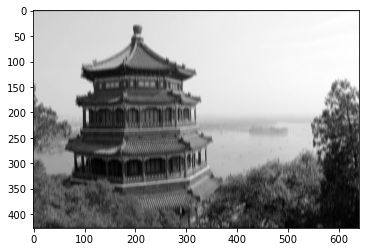

In [350]:
output = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')
print(output.shape)
plt.imshow(output[0, :, :, 0], cmap = 'gray')

In [351]:
images = tf.cast(images, tf.float32)
conv2d = tf.keras.layers.Conv2D(filters = 2, kernel_size = (7, 7),padding = 'same')
y = conv2d(images)
y.shape

TensorShape([2, 427, 640, 2])

In [352]:
conv2d = tf.keras.layers.Conv2D(filters = 1, kernel_size = (7, 7), padding = 'same')
yy = conv2d(y)
yy.shape

TensorShape([2, 427, 640, 1])

&lt;matplotlib.image.AxesImage at 0x1a3c4148&gt;

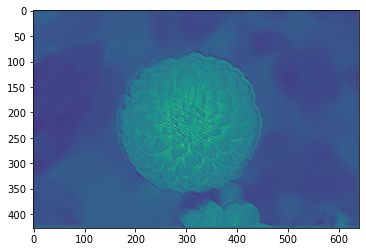

In [353]:
plt.imshow(yy[1, :, :, 0])#, cmap = 'gray')

In [370]:
m = tf.keras.metrics.Precision()
m.update_state([0, 0, 1, 1,1,1], [1, 1, 1, 1,2,2])
m.result().numpy()

InvalidArgumentError: predictions must be &lt;= 1
Condition x &lt;= y did not hold.
First 3 elements of x:
[1. 1. 1.]
First 1 elements of y:
[1.]